# Lito - Case

<img align="left" width="80" height="200" src="https://img.shields.io/badge/python-v3.6-blue.svg">
<br>

## Table of contents

1. [Import Libraries and Data](#Import-Libraries-and-Data)
4. [Data Cleaning](#Data-Cleaning)
5. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
4. [Features Through Time](#Features-Through-Time)


## Import Libraries and Data
[[go back to the top]](#Table-of-contents)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
import seaborn as sns; sns.set(rc={'figure.figsize':(16,9)})
import itertools, math, warnings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sns.set(color_codes=True)
plt.style.use('seaborn')
warnings.filterwarnings("ignore")
%matplotlib inline
%autosave 30

Autosaving every 30 seconds


In [2]:
PATH = 'data/orders-6-months-clean.csv'
df = pd.read_csv(PATH)
print('(number of observations, number of features) =', df.shape)

(number of observations, number of features) = (18913, 22)


In [3]:
num = 3
print('First {} rows:\n'.format(num))
df.head(num)
print('Last {} rows:\n'.format(num))
df.tail(num)

First 3 rows:



,Origin,Sequence,Creation Date,Client Document,State,City,Neighborhood,Carrier,Delivery Deadline,Status,Utmi,Payment System Name,Installments,ID_SKU,Category Ids Sku,SKU Value,SKU Selling Price,SKU Total Price,Shipping List Price,Shipping Value,Total Value,Discounts Totals
0,B2C Channel,614743,2018-02-28 02:01:51Z,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Pac,12bd,Canceled,- - -,Visa,5,126755,/3/42/,199,199,199,9.3,0.0,438.0,0.0
1,B2C Channel,614743,2018-02-28 02:01:51Z,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Pac,12bd,Canceled,- - -,Visa,5,116363,/3/36/,239,239,239,9.3,0.0,438.0,0.0
2,B2C Channel,614746,2018-02-28 02:09:26Z,XYA87A9X7YX,RJ,Duque de Caxias,Parque Duque,Pac,12bd,Canceled,- - -,Visa,5,126755,/3/42/,199,199,199,9.3,0.0,438.0,0.0


Last 3 rows:



,Origin,Sequence,Creation Date,Client Document,State,City,Neighborhood,Carrier,Delivery Deadline,Status,Utmi,Payment System Name,Installments,ID_SKU,Category Ids Sku,SKU Value,SKU Selling Price,SKU Total Price,Shipping List Price,Shipping Value,Total Value,Discounts Totals
18910,B2C Channel,658042,2018-08-30 19:50:37Z,8570203748,RJ,Teres�polis,V�rzea,Transportadora,8bd,Payment pending,cpc - google - - brand,Mastercard,4,131834,/3/35/,199,199,199,26.58,26.58,225.58,0.0
18911,B2C Channel,658045,2018-08-30 19:55:28Z,15506641745,RJ,Rio de Janeiro,Botafogo,Retirada em Loja (18fd71a),6bd,Payment pending,- - -,Mastercard,5,131837,/3/35/,199,199,199,0.00,0.00,358.00,0.0
18912,B2C Channel,658045,2018-08-30 19:55:28Z,15506641745,RJ,Rio de Janeiro,Botafogo,Retirada em Loja (18fd71a),6bd,Payment pending,- - -,Mastercard,5,131434,/3/,159,159,159,0.00,0.00,358.00,0.0


## Data Cleaning
[[go back to the top]](#Table-of-contents)

### Drop `NaNs`

In [4]:
df.dropna(inplace=True)

### Tidying up the names of the columns:

In [5]:
df.columns = [col.lower().replace('-','_').replace(' ','_') 
              for col in df.columns]

### Types of `status` 

In [6]:
df['status'].value_counts()

Invoiced              11939
Canceled               5685
Ready for shipping      378
Payment pending         111
Name: status, dtype: int64

### Dropping the canceled orders and reseting the indexes

In [7]:
df = df[df.status != 'Canceled'].copy()
df.reset_index(inplace=True, drop=True)

### Checking data types

In [8]:
df.head(num-2)

,origin,sequence,creation_date,client_document,state,city,neighborhood,carrier,delivery_deadline,status,utmi,payment_system_name,installments,id_sku,category_ids_sku,sku_value,sku_selling_price,sku_total_price,shipping_list_price,shipping_value,total_value,discounts_totals
0,B2C Channel,614845,2018-02-28 16:52:40Z,X0AX9YK97K0,RJ,Rio de Janeiro,Campo Grande,Sedex,4bd,Invoiced,- - -,Mastercard,4,123911,/3/39/,239,239,239,12.78,0.0,239.0,0.0


We see below that there is something wrong with:
- installments
- sku_value
- sku_selling_price
- sku_total_price 

since they should be integers or floats and are, instead, objects.

In [9]:
df.dtypes

origin                  object
sequence                object
creation_date           object
client_document         object
state                   object
city                    object
neighborhood            object
carrier                 object
delivery_deadline       object
status                  object
utmi                    object
payment_system_name     object
installments            object
id_sku                  object
category_ids_sku        object
sku_value               object
sku_selling_price       object
sku_total_price         object
shipping_list_price    float64
shipping_value         float64
total_value            float64
discounts_totals       float64
dtype: object

### Let us convert them into numerical variables

In [10]:
cols = ['installments', 'sku_value', 
        'sku_selling_price', 'sku_total_price']

df[cols] = df[cols].apply(pd.to_numeric)

### Note that `city` for example, has different entries corresponding to the same entity

See for example `BARRA MANSA` and `Barra Mansa`. We can solve this specific issue by removing problematic characters. This is a temporary solution.

In [11]:
print('Cities:\n')
pd.Series(df.city.unique()).sort_values().iloc[38:51].to_frame(name='Cities')

Cities:



,Cities
470,BARRA MANSA
206,BARRINHA
359,BELFORD ROXO
275,BLUMENAU
14,BRAS�LIA
513,Bag�
309,Balne�rio Cambori�
266,Bananal
7,Barbacena
182,Barbalha


In [12]:
cols = ['state','city','neighborhood',
        'carrier','status','payment_system_name']
df[cols] = df[cols].apply(lambda x: x.str.lower())

In [13]:
import unidecode

for col in cols:
    df[col] = [unidecode.unidecode(str(row)) for row in df[col]]

### The `origin` column has problems as well

In [14]:
df['origin'].value_counts()

B2C Channel                                                12375
Marketplace                                                   49
Vtex.Commerce.Oms.Helper.ReadWriteCsv+CsvRowB2C Channel        4
Name: origin, dtype: int64

In [15]:
df['origin'].replace('Vtex.Commerce.Oms.Helper.ReadWriteCsv+CsvRowB2C Channel',
                     'B2C Channel', inplace=True)

In [16]:
df['origin'].value_counts()

B2C Channel    12379
Marketplace       49
Name: origin, dtype: int64

### Number of unique clients

In [17]:
df['client_document'].nunique()

6295

In [18]:
cols = ['origin', 'client_document', 'state', 'city', 
        'neighborhood', 'status', 'payment_system_name']

for col in cols:
    print(col,':', df[col].nunique())

origin : 2
client_document : 6295
state : 27
city : 505
neighborhood : 1527
status : 3
payment_system_name : 9


### Checking memory usage

Checking memory usage is useful when `pandas` is dealing with very large datasets. This dataset is not particularly large but I will optimize it anyway and use the same code in the second part of the challenge.

Below, choosing the parameter `deep` in the method `info()` provides more [accuracy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html).

In [19]:
df.info(memory_usage='deep') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12428 entries, 0 to 12427
Data columns (total 22 columns):
origin                 12428 non-null object
sequence               12428 non-null object
creation_date          12428 non-null object
client_document        12428 non-null object
state                  12428 non-null object
city                   12428 non-null object
neighborhood           12428 non-null object
carrier                12428 non-null object
delivery_deadline      12428 non-null object
status                 12428 non-null object
utmi                   12428 non-null object
payment_system_name    12428 non-null object
installments           12428 non-null int64
id_sku                 12428 non-null object
category_ids_sku       12428 non-null object
sku_value              12428 non-null float64
sku_selling_price      12428 non-null float64
sku_total_price        12428 non-null float64
shipping_list_price    12428 non-null float64
shipping_value         12428 non-

### Reducing memory usage

Though the dataframe's memory usage is relatively low, it can be reduced. We can use a [function](https://www.dataquest.io/blog/pandas-big-data/) to memory reducing.
Let us use a [function](https://www.dataquest.io/blog/pandas-big-data/) for that which assumes the input to be a `Dataframe`.

In [20]:
def compute_memory(x):
    usage_mb = x.memory_usage(deep=True).sum()/(1024 ** 2 ) 
    return "Total usage is {} MB".format(usage_mb)

### Downcasting to float32

In [21]:
df_floats = df.select_dtypes(include=['float'])
converted_float = df_floats.apply(pd.to_numeric, downcast='float')
compare_floats = pd.concat([df_floats.dtypes, converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.head()

,before,after
sku_value,float64,float32
sku_selling_price,float64,float32
sku_total_price,float64,float32
shipping_list_price,float64,float32
shipping_value,float64,float32


### Checking the memory gain:

In [22]:
optimized_df = df.copy()
optimized_df[converted_float.columns] = converted_float
df = optimized_df.copy()
df.info(memory_usage='deep')

df.to_csv('df_clean.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12428 entries, 0 to 12427
Data columns (total 22 columns):
origin                 12428 non-null object
sequence               12428 non-null object
creation_date          12428 non-null object
client_document        12428 non-null object
state                  12428 non-null object
city                   12428 non-null object
neighborhood           12428 non-null object
carrier                12428 non-null object
delivery_deadline      12428 non-null object
status                 12428 non-null object
utmi                   12428 non-null object
payment_system_name    12428 non-null object
installments           12428 non-null int64
id_sku                 12428 non-null object
category_ids_sku       12428 non-null object
sku_value              12428 non-null float32
sku_selling_price      12428 non-null float32
sku_total_price        12428 non-null float32
shipping_list_price    12428 non-null float32
shipping_value         12428 non-

In [23]:
df = pd.read_csv('df_clean.csv')
df = df.iloc[:,1:]
df.head()

,origin,sequence,creation_date,client_document,state,city,neighborhood,carrier,delivery_deadline,status,utmi,payment_system_name,installments,id_sku,category_ids_sku,sku_value,sku_selling_price,sku_total_price,shipping_list_price,shipping_value,total_value,discounts_totals
0,B2C Channel,614845,2018-02-28 16:52:40Z,X0AX9YK97K0,rj,rio de janeiro,campo grande,sedex,4bd,invoiced,- - -,mastercard,4,123911,/3/39/,239.0,239.0,239.0,12.78,0.0,239.0,0.0
1,B2C Channel,614737,2018-02-28 01:09:59Z,X0YKY79YK0K,mg,carangola,santa maria,sedex,6bd,invoiced,- - -,mastercard,4,116363,/3/36/,239.0,239.0,239.0,41.35,0.0,239.0,0.0
2,B2C Channel,614752,2018-02-28 02:29:28Z,XBY0YBXA709,rj,rio de janeiro,maracan,ciclo verde,2bd,ready for shipping,- - -,mastercard,5,122075,/3/42/,199.0,159.2,199.0,4.22,0.0,397.6,-99.4
3,B2C Channel,614752,2018-02-28 02:29:28Z,XBY0YBXA709,rj,rio de janeiro,maracan,ciclo verde,2bd,ready for shipping,- - -,mastercard,5,126811,/3/39/,199.0,159.2,199.0,4.24,0.0,397.6,-99.4
4,B2C Channel,614752,2018-02-28 02:29:28Z,XBY0YBXA709,rj,rio de janeiro,maracan,ciclo verde,2bd,ready for shipping,- - -,mastercard,5,122038,/1/6/28/,99.0,79.2,99.0,1.52,0.0,397.6,-99.4


## Exploratory Data Analysis 
[[go back to the top]](#Table-of-contents)

In [24]:
cols = ['sequence','installments', 'id_sku', 
        'category_ids_sku', 'sku_value', 'sku_selling_price', 'sku_total_price', 
        'shipping_list_price', 'shipping_value', 'total_value', 'discounts_totals']

### The column  `sequence` defines an order, which may contain several SKUs

In [25]:
data = df[['client_document','state',
           'city','neighborhood',
           'sequence', 'total_value']]

df1 = data.copy()

df1 = df1['total_value'].groupby(df1['client_document']).sum()
df1 = df1.sort_values(ascending=False)
df1 = df1.to_frame(name='total_value_per_client')
df1.head()

,total_value_per_client
client_document,
7213315722,81871.95
4333596173,60044.40
AB0870YB888,35190.54
5368706758,29216.20
5129001320,26117.60


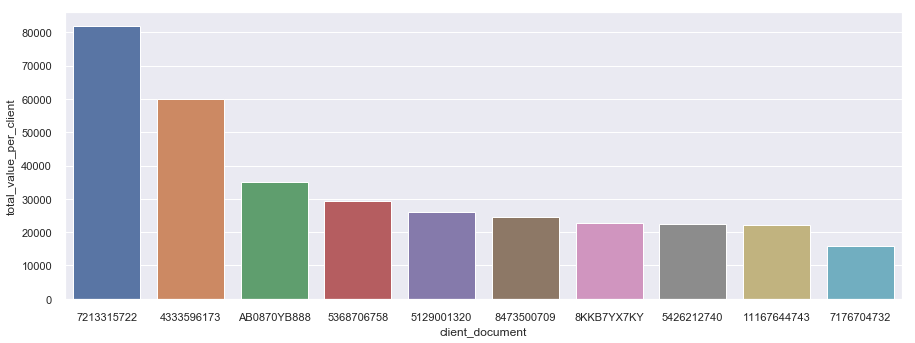

In [26]:
df1['client_document'] = df1.index
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5.27)})
ax = sns.barplot(x="client_document", y="total_value_per_client", data=df1.iloc[:10,:])

In [27]:
df2 = data.copy()

df2 = df2['total_value'].groupby(df2['neighborhood']).sum()
df2 = df2.sort_values(ascending=False).to_frame(name='total_value_per_neighborhood')
df2.head()
df2['neighborhood'] = df2.index

,total_value_per_neighborhood
neighborhood,
centro,477544.61
tijuca,143773.29
cachambi,134236.70
santos dumont,107832.84
botafogo,96018.67


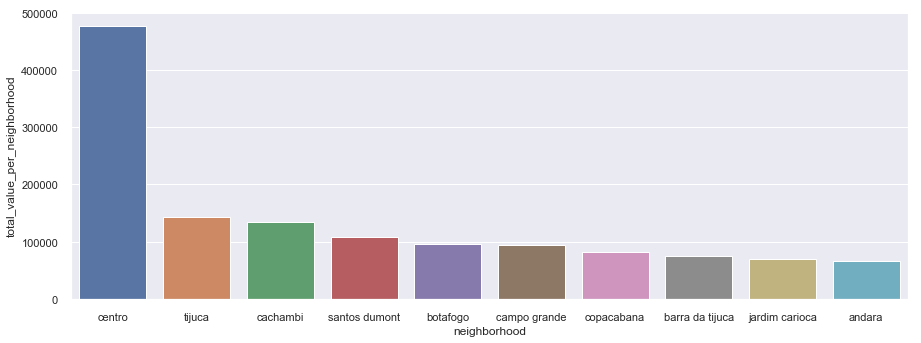

In [28]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5.27)})
ax = sns.barplot(x="neighborhood", y="total_value_per_neighborhood", data=df2.iloc[:10,:],orient='v')

In [29]:
df4 = data.copy()

df4 = df4['total_value'].groupby(df4['state']).sum()
df4 = df4.sort_values(ascending=False).to_frame(name='total_value_per_state')
df4.head()
df4['state'] = df4.index

,total_value_per_state
state,
rj,2513766.97
sp,353627.61
mg,255238.78
se,203092.41
pa,145371.40


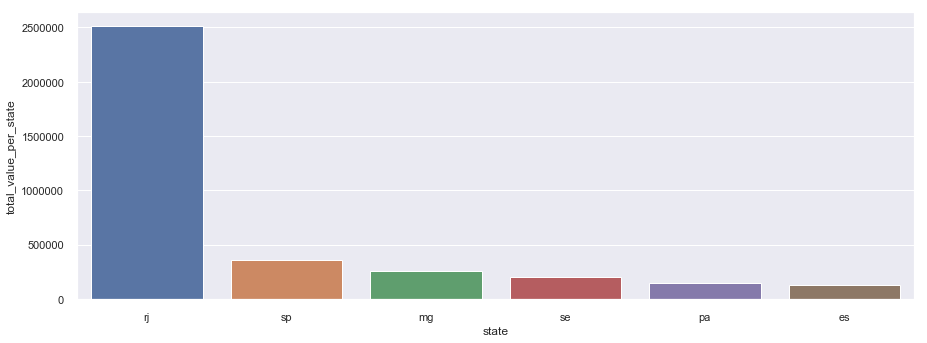

In [30]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5.27)})
ax = sns.barplot(x="state", y="total_value_per_state", data=df4.iloc[:6,:])

In [31]:
df5 = data.copy()
df5 = df5['total_value'].groupby(df5['city']).sum()
df5 = df5.sort_values(ascending=False).to_frame(name='total_value_per_city')
df5.head()
df5.shape
df5['city'] = df5.index

,total_value_per_city
city,
rio de janeiro,1686175.25
aracaju,201882.48
so paulo,185235.12
nova iguau,140898.18
duque de caxias,129231.78


(505, 1)

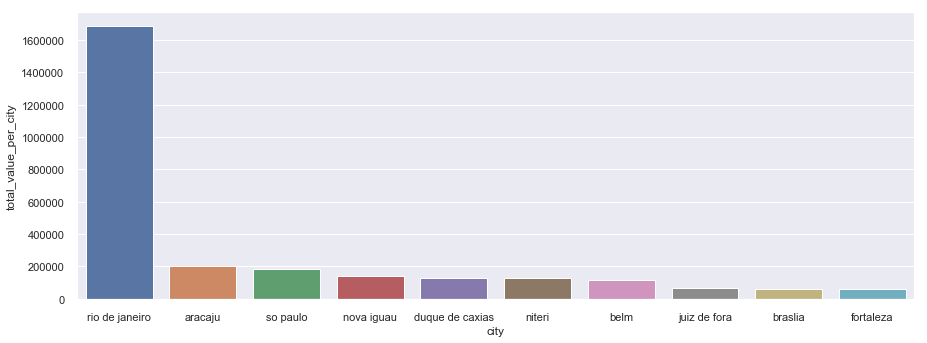

In [32]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5.27)})
ax = sns.barplot(x="city", y="total_value_per_city", data=df5.iloc[:10,:])

### Excluding `rio de janeiro`

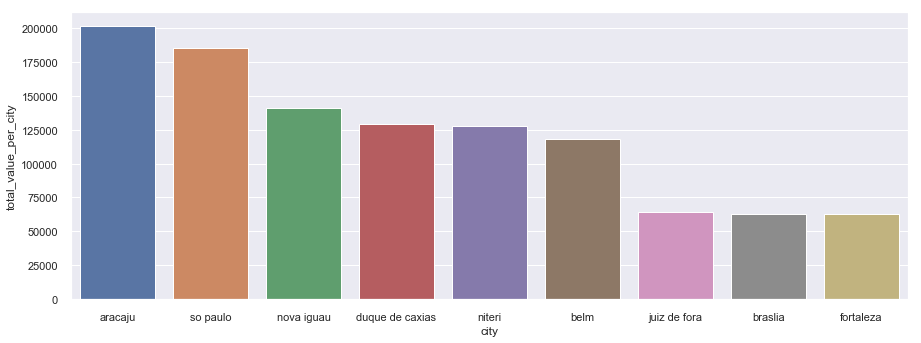

In [33]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5.27)})
ax = sns.barplot(x="city", y="total_value_per_city", data=df5.iloc[1:10,:])

### Total value per `sequence` i.e. per purchase 

In [34]:
df1 = data.copy()

df1 = df1['total_value'].groupby(df1['sequence']).sum()
df1 = df1.to_frame(name='total_value_per_purchase')
df1['sequence'] = df1.index
df1['sequence'] = [str(x) for x in df1['sequence']]
df1.dtypes
df2 = pd.DataFrame()

df2 = pd.DataFrame(columns=['sequence', 'total_value_per_purchase'])
df2['sequence'] = df1.index
df2['total_value_per_purchase'] = list(df1['total_value_per_purchase'])
df2 = df2.sort_values(by='total_value_per_purchase', ascending=False)
df2.reset_index(inplace=True, drop=True)
df2['purchase'] = df2.index
df2.head()

total_value_per_purchase    float64
sequence                     object
dtype: object

,sequence,total_value_per_purchase,purchase
0,653493,81871.95,0
1,624290,46184.40,1
2,622809,35190.54,2
3,644022,29216.20,3
4,643430,24650.88,4


### Dictionary

In [35]:
dictionary = df2[['purchase', 'sequence']].copy()
dictionary.head()

,purchase,sequence
0,0,653493
1,1,624290
2,2,622809
3,3,644022
4,4,643430


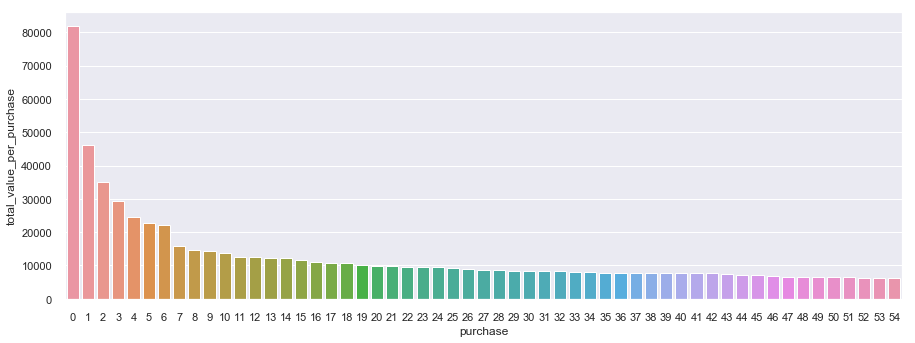

In [36]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5.27)})
ax = sns.barplot(x="purchase", y="total_value_per_purchase", data=df2.iloc[:55,:])

### Exemplo de um evento de compra envolvendo varios SKUs
A compra total é definida pela `sequence` e os produtos sao definidos por `id_sku`. Repare que as datas `creation_date` são as mesmas e estão em correspondencia 1-1 com as `sequences`.

Esse documento

    doc = '5129001320'
    
é uma escolha qualquer.

In [37]:
cols = ['origin','sequence', 'installments', 'creation_date', 'id_sku', 'category_ids_sku', 'sku_value', 
        'sku_selling_price', 'sku_total_price', 'shipping_list_price', 
        'shipping_value', 'total_value', 'discounts_totals', ]

doc = '5129001320'

df[df['client_document'] == doc][cols].iloc[:5, :]

,origin,sequence,installments,creation_date,id_sku,category_ids_sku,sku_value,sku_selling_price,sku_total_price,shipping_list_price,shipping_value,total_value,discounts_totals
5181,B2C Channel,635283,5,2018-06-06 22:23:42Z,131436,/3/,299.0,299.0,299.0,14.88,0.0,915.0,0.0
5182,B2C Channel,635283,5,2018-06-06 22:23:42Z,131485,/1/6/28/,179.0,179.0,179.0,6.38,0.0,915.0,0.0
5183,B2C Channel,635283,5,2018-06-06 22:23:42Z,129067,/1/6/28/,199.0,199.0,199.0,5.32,0.0,915.0,0.0
5184,B2C Channel,635283,5,2018-06-06 22:23:42Z,127646,/1/6/28/,139.0,139.0,139.0,5.32,0.0,915.0,0.0
5185,B2C Channel,635283,5,2018-06-06 22:23:42Z,128064,/1/6/28/,99.0,99.0,99.0,5.32,0.0,915.0,0.0


Somando-se os preços de venda dos `skus` dessa compra, dados pela coluna `sku_selling_price`, obtemos o valor que aparece (repetido cinco vezes) na coluna `total_value`.

In [38]:
df[df['client_document'] == doc][cols].iloc[:5, :]['sku_selling_price'].sum()

915.0

Fazendo a mesma conta fixando a `sequence`

In [39]:
seq = 635283
df1 = df[df['client_document'] == doc]
df1[df1.sequence == seq][cols].sku_selling_price.sum()

915.0

## Importancia de cada cartão

In [40]:
psn = df['payment_system_name'].value_counts().to_frame(name='total')
psn['payment_system_name'] = psn.index

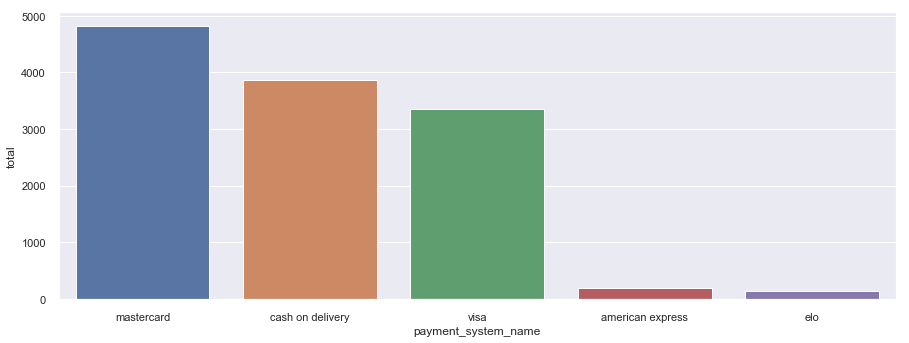

In [41]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5.27)})
ax = sns.barplot(x="payment_system_name", y="total", data=psn.iloc[:5,:])

## Importancia dos clientes

In [42]:
client_neigh = pd.Series(df['neighborhood'].groupby(df['client_document']).count())
client_neigh = client_neigh.sort_values(ascending=False)
client_neigh = client_neigh.to_frame(name='document')

client_neigh.sort_values(by='document', ascending=False).head()

,document
client_document,
5129001320,43
4333596173,39
5032994642,35
11153171724,31
7213315722,23


## Features Through Time
[[go back to the top]](#Table-of-contents)

### Separando as datas e horas

In [43]:
df_dates = df[['creation_date']]

df_dates = pd.DataFrame(df_dates.creation_date.str.split(' ',1).tolist(),
                        columns = ['day','hour'])

df_dates.head()
df_dates.tail()

,day,hour
0,2018-02-28,16:52:40Z
1,2018-02-28,01:09:59Z
2,2018-02-28,02:29:28Z
3,2018-02-28,02:29:28Z
4,2018-02-28,02:29:28Z


,day,hour
12423,2018-08-30,19:38:16Z
12424,2018-08-30,19:38:16Z
12425,2018-08-30,19:50:37Z
12426,2018-08-30,19:55:28Z
12427,2018-08-30,19:55:28Z


In [44]:
df.head()

,origin,sequence,creation_date,client_document,state,city,neighborhood,carrier,delivery_deadline,status,utmi,payment_system_name,installments,id_sku,category_ids_sku,sku_value,sku_selling_price,sku_total_price,shipping_list_price,shipping_value,total_value,discounts_totals
0,B2C Channel,614845,2018-02-28 16:52:40Z,X0AX9YK97K0,rj,rio de janeiro,campo grande,sedex,4bd,invoiced,- - -,mastercard,4,123911,/3/39/,239.0,239.0,239.0,12.78,0.0,239.0,0.0
1,B2C Channel,614737,2018-02-28 01:09:59Z,X0YKY79YK0K,mg,carangola,santa maria,sedex,6bd,invoiced,- - -,mastercard,4,116363,/3/36/,239.0,239.0,239.0,41.35,0.0,239.0,0.0
2,B2C Channel,614752,2018-02-28 02:29:28Z,XBY0YBXA709,rj,rio de janeiro,maracan,ciclo verde,2bd,ready for shipping,- - -,mastercard,5,122075,/3/42/,199.0,159.2,199.0,4.22,0.0,397.6,-99.4
3,B2C Channel,614752,2018-02-28 02:29:28Z,XBY0YBXA709,rj,rio de janeiro,maracan,ciclo verde,2bd,ready for shipping,- - -,mastercard,5,126811,/3/39/,199.0,159.2,199.0,4.24,0.0,397.6,-99.4
4,B2C Channel,614752,2018-02-28 02:29:28Z,XBY0YBXA709,rj,rio de janeiro,maracan,ciclo verde,2bd,ready for shipping,- - -,mastercard,5,122038,/1/6/28/,99.0,79.2,99.0,1.52,0.0,397.6,-99.4


In [45]:
df_dates['hour'] = [el[:-1] for el in df_dates['hour']]

In [46]:
cols = ['origin', 'sequence', 'client_document',
        'state', 'city', 'neighborhood', 'carrier', 'delivery_deadline', 
        'status', 'utmi', 'payment_system_name', 'installments', 'id_sku', 
        'category_ids_sku', 'sku_value', 'sku_selling_price', 'sku_total_price', 'shipping_list_price', 
        'shipping_value', 'total_value', 'discounts_totals']
dfnew = df[cols]

In [47]:
dfnew = pd.concat([dfnew, df_dates], axis=1)

In [48]:
cols = ['origin', 'sequence', 'day', 'hour', 'client_document',
        'state', 'city', 'neighborhood', 'carrier', 'delivery_deadline', 
        'status', 'utmi', 'payment_system_name', 'installments', 'id_sku', 
        'category_ids_sku', 'sku_value', 'sku_selling_price', 'sku_total_price', 'shipping_list_price', 
        'shipping_value', 'total_value', 'discounts_totals']
dfnew = dfnew[cols]

In [49]:
dfnew.head()

,origin,sequence,day,hour,client_document,state,city,neighborhood,carrier,delivery_deadline,status,utmi,payment_system_name,installments,id_sku,category_ids_sku,sku_value,sku_selling_price,sku_total_price,shipping_list_price,shipping_value,total_value,discounts_totals
0,B2C Channel,614845,2018-02-28,16:52:40,X0AX9YK97K0,rj,rio de janeiro,campo grande,sedex,4bd,invoiced,- - -,mastercard,4,123911,/3/39/,239.0,239.0,239.0,12.78,0.0,239.0,0.0
1,B2C Channel,614737,2018-02-28,01:09:59,X0YKY79YK0K,mg,carangola,santa maria,sedex,6bd,invoiced,- - -,mastercard,4,116363,/3/36/,239.0,239.0,239.0,41.35,0.0,239.0,0.0
2,B2C Channel,614752,2018-02-28,02:29:28,XBY0YBXA709,rj,rio de janeiro,maracan,ciclo verde,2bd,ready for shipping,- - -,mastercard,5,122075,/3/42/,199.0,159.2,199.0,4.22,0.0,397.6,-99.4
3,B2C Channel,614752,2018-02-28,02:29:28,XBY0YBXA709,rj,rio de janeiro,maracan,ciclo verde,2bd,ready for shipping,- - -,mastercard,5,126811,/3/39/,199.0,159.2,199.0,4.24,0.0,397.6,-99.4
4,B2C Channel,614752,2018-02-28,02:29:28,XBY0YBXA709,rj,rio de janeiro,maracan,ciclo verde,2bd,ready for shipping,- - -,mastercard,5,122038,/1/6/28/,99.0,79.2,99.0,1.52,0.0,397.6,-99.4


In [50]:
df = dfnew.copy()
df['day'] = pd.to_datetime(df['day'])

In [51]:
df.dtypes

origin                         object
sequence                        int64
day                    datetime64[ns]
hour                           object
client_document                object
state                          object
city                           object
neighborhood                   object
carrier                        object
delivery_deadline              object
status                         object
utmi                           object
payment_system_name            object
installments                    int64
id_sku                          int64
category_ids_sku               object
sku_value                     float64
sku_selling_price             float64
sku_total_price               float64
shipping_list_price           float64
shipping_value                float64
total_value                   float64
discounts_totals              float64
dtype: object

In [52]:
df.head()

,origin,sequence,day,hour,client_document,state,city,neighborhood,carrier,delivery_deadline,status,utmi,payment_system_name,installments,id_sku,category_ids_sku,sku_value,sku_selling_price,sku_total_price,shipping_list_price,shipping_value,total_value,discounts_totals
0,B2C Channel,614845,2018-02-28,16:52:40,X0AX9YK97K0,rj,rio de janeiro,campo grande,sedex,4bd,invoiced,- - -,mastercard,4,123911,/3/39/,239.0,239.0,239.0,12.78,0.0,239.0,0.0
1,B2C Channel,614737,2018-02-28,01:09:59,X0YKY79YK0K,mg,carangola,santa maria,sedex,6bd,invoiced,- - -,mastercard,4,116363,/3/36/,239.0,239.0,239.0,41.35,0.0,239.0,0.0
2,B2C Channel,614752,2018-02-28,02:29:28,XBY0YBXA709,rj,rio de janeiro,maracan,ciclo verde,2bd,ready for shipping,- - -,mastercard,5,122075,/3/42/,199.0,159.2,199.0,4.22,0.0,397.6,-99.4
3,B2C Channel,614752,2018-02-28,02:29:28,XBY0YBXA709,rj,rio de janeiro,maracan,ciclo verde,2bd,ready for shipping,- - -,mastercard,5,126811,/3/39/,199.0,159.2,199.0,4.24,0.0,397.6,-99.4
4,B2C Channel,614752,2018-02-28,02:29:28,XBY0YBXA709,rj,rio de janeiro,maracan,ciclo verde,2bd,ready for shipping,- - -,mastercard,5,122038,/1/6/28/,99.0,79.2,99.0,1.52,0.0,397.6,-99.4


### Purchase day feature

In [53]:
sales_per_day = df.groupby('day', as_index=False).total_value.sum()
sales_per_day.head()

,day,total_value
0,2018-02-28,12875.42
1,2018-03-01,11968.62
2,2018-03-02,14598.09
3,2018-03-03,19647.58
4,2018-03-04,8445.65


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1289d0f0>]],
      dtype=object)

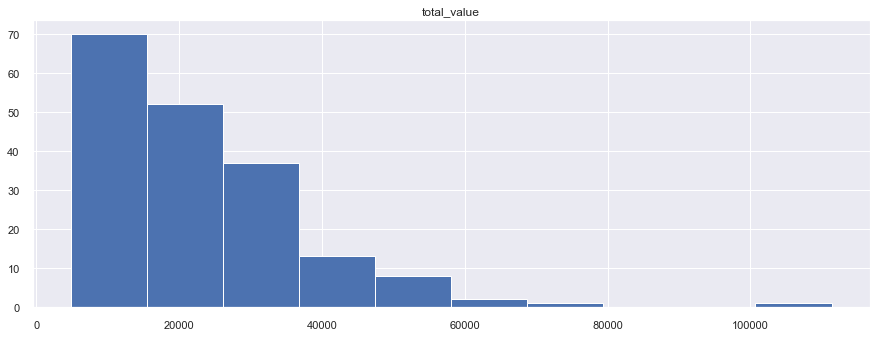

In [54]:
sales_per_day.hist()

In [55]:
sales_per_day.dtypes

day            datetime64[ns]
total_value           float64
dtype: object

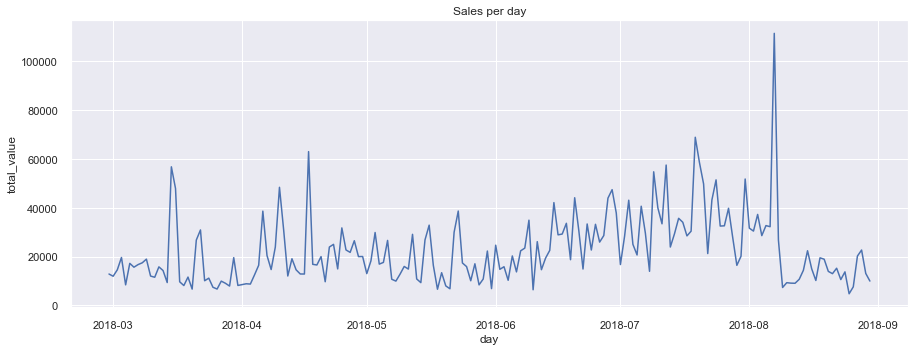

In [56]:
ax = sns.lineplot(x="day", y="total_value", data=sales_per_day, )
sns.set(rc={'figure.figsize':(20,5.27)})
ax.set_title('Sales per day');

### Purchase per week

In [57]:
df['hour'] = pd.to_datetime(df['hour'])
df.dtypes

origin                         object
sequence                        int64
day                    datetime64[ns]
hour                   datetime64[ns]
client_document                object
state                          object
city                           object
neighborhood                   object
carrier                        object
delivery_deadline              object
status                         object
utmi                           object
payment_system_name            object
installments                    int64
id_sku                          int64
category_ids_sku               object
sku_value                     float64
sku_selling_price             float64
sku_total_price               float64
shipping_list_price           float64
shipping_value                float64
total_value                   float64
discounts_totals              float64
dtype: object

In [58]:
df['order_purchase_week'] = df.day.dt.to_period('W').astype(str)
df.head()
df.dtypes

,origin,sequence,day,hour,client_document,state,city,neighborhood,carrier,delivery_deadline,status,utmi,payment_system_name,installments,id_sku,category_ids_sku,sku_value,sku_selling_price,sku_total_price,shipping_list_price,shipping_value,total_value,discounts_totals,order_purchase_week
0,B2C Channel,614845,2018-02-28,2019-04-16 16:52:40,X0AX9YK97K0,rj,rio de janeiro,campo grande,sedex,4bd,invoiced,- - -,mastercard,4,123911,/3/39/,239.0,239.0,239.0,12.78,0.0,239.0,0.0,2018-02-26/2018-03-04
1,B2C Channel,614737,2018-02-28,2019-04-16 01:09:59,X0YKY79YK0K,mg,carangola,santa maria,sedex,6bd,invoiced,- - -,mastercard,4,116363,/3/36/,239.0,239.0,239.0,41.35,0.0,239.0,0.0,2018-02-26/2018-03-04
2,B2C Channel,614752,2018-02-28,2019-04-16 02:29:28,XBY0YBXA709,rj,rio de janeiro,maracan,ciclo verde,2bd,ready for shipping,- - -,mastercard,5,122075,/3/42/,199.0,159.2,199.0,4.22,0.0,397.6,-99.4,2018-02-26/2018-03-04
3,B2C Channel,614752,2018-02-28,2019-04-16 02:29:28,XBY0YBXA709,rj,rio de janeiro,maracan,ciclo verde,2bd,ready for shipping,- - -,mastercard,5,126811,/3/39/,199.0,159.2,199.0,4.24,0.0,397.6,-99.4,2018-02-26/2018-03-04
4,B2C Channel,614752,2018-02-28,2019-04-16 02:29:28,XBY0YBXA709,rj,rio de janeiro,maracan,ciclo verde,2bd,ready for shipping,- - -,mastercard,5,122038,/1/6/28/,99.0,79.2,99.0,1.52,0.0,397.6,-99.4,2018-02-26/2018-03-04


origin                         object
sequence                        int64
day                    datetime64[ns]
hour                   datetime64[ns]
client_document                object
state                          object
city                           object
neighborhood                   object
carrier                        object
delivery_deadline              object
status                         object
utmi                           object
payment_system_name            object
installments                    int64
id_sku                          int64
category_ids_sku               object
sku_value                     float64
sku_selling_price             float64
sku_total_price               float64
shipping_list_price           float64
shipping_value                float64
total_value                   float64
discounts_totals              float64
order_purchase_week            object
dtype: object

### Creating an aggregation

In [59]:
sales_per_purchase_week = df.groupby('order_purchase_week', as_index=False).total_value.sum()
sales_per_purchase_week.head()

,order_purchase_week,total_value
0,2018-02-26/2018-03-04,67535.36
1,2018-03-05/2018-03-11,109688.95
2,2018-03-12/2018-03-18,161978.93
3,2018-03-19/2018-03-25,104795.74
4,2018-03-26/2018-04-01,70085.75


In [60]:
sales_per_purchase_week['idx'] = sales_per_purchase_week.index

In [61]:
sales_per_purchase_week.head()

,order_purchase_week,total_value,idx
0,2018-02-26/2018-03-04,67535.36,0
1,2018-03-05/2018-03-11,109688.95,1
2,2018-03-12/2018-03-18,161978.93,2
3,2018-03-19/2018-03-25,104795.74,3
4,2018-03-26/2018-04-01,70085.75,4


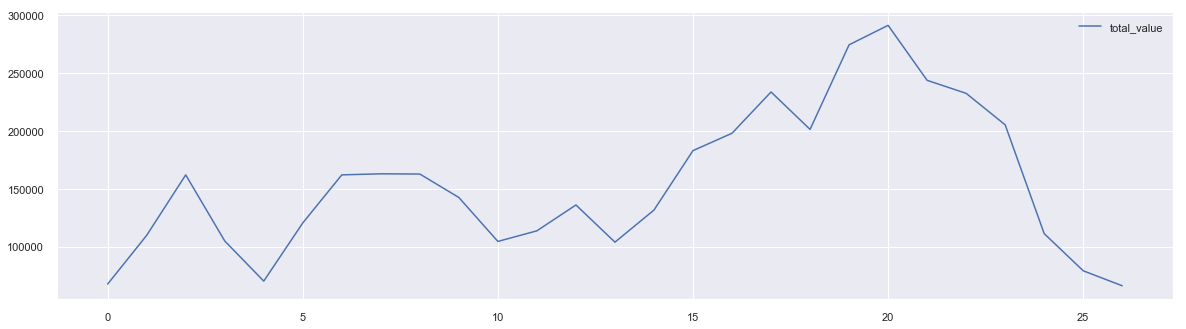

In [63]:
# ax = sns.lineplot(x="order_purchase_week", y="total_value", data=sales_per_purchase_week)
# ax.set_title('Sales per week')
sales_per_purchase_week.iloc[:,:-1].plot();

In [64]:
sales_per_hour = df.groupby('hour', as_index=False).total_value.sum()
sales_per_hour.head()

,hour,total_value
0,2019-04-16 00:00:00,109.51
1,2019-04-16 00:00:03,239.00
2,2019-04-16 00:00:05,650.97
3,2019-04-16 00:00:44,239.00
4,2019-04-16 00:01:03,88.94


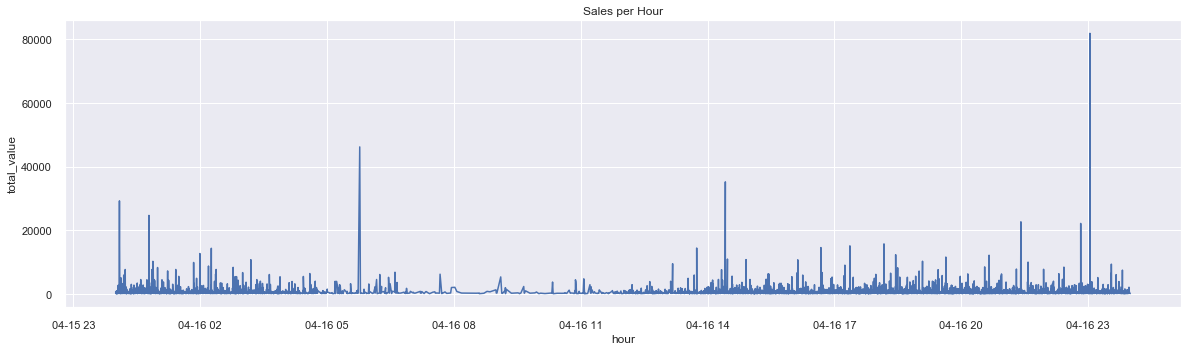

In [65]:
ax = sns.lineplot(x="hour", y="total_value", data=sales_per_hour)
sns.set(rc={'figure.figsize':(20,5.27)})
ax.set_title('Sales per Hour');